# ST5227 Homework 1

Tay Yong Qiang, 1st February 2021

Homework 1 Q3, Q4 computations

In [1]:
import numpy as np
from math import log,sqrt
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [2]:
pd.set_option('display.max_rows', 10)

Q3

Import data from `data01T01.dat` then add the quadratic and cubic term to the dataframe.

In [3]:
q3_df = pd.read_table("data01T01.dat", skiprows=1, names=["x", "y"], sep="   ", engine="python")
q3_df["x2"] = q3_df["x"].map(lambda x: x*x)
q3_df["x3"] = q3_df["x"].map(lambda x: x*x*x)

q3_df.head()

,x,y,x2,x3
0,1.5311,5.0722,2.344267,3.589308
1,-0.4350,4.1753,0.189225,-0.082313
2,-1.6068,5.0919,2.581806,-4.148446
3,-0.5698,3.4605,0.324672,-0.184998
4,1.7088,5.2301,2.919997,4.989692


Add a column of ones to `X` and specify the X and y values for training a linear model.

In [4]:
X_train = q3_df[["x", "x2", "x3"]].to_numpy()
X_train = sm.add_constant(X_train)
y_train = q3_df["y"].to_numpy()

Fit a linear regression model

In [5]:
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     71.88
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.17e-17
Time:                        22:36:51   Log-Likelihood:                -103.60
No. Observations:                  50   AIC:                             215.2
Df Residuals:                      46   BIC:                             222.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1978      0.469     -0.422      0.6

In [6]:
display(Latex(r'$\hat{\beta_0} = ' + f'{results.params[0]}$, ' +
              r'$\hat{\beta_1} = ' + f'{results.params[1]}$, ' +
              r'$\hat{\beta_2} = ' + f'{results.params[2]}$, ' +
              r'$\hat{\beta_3} = ' + f'{results.params[3]}$'))

<IPython.core.display.Latex object>

In [7]:
sigma_hat_sq = np.sum(np.square(results.fittedvalues - y_train)) / (len(y_train) - 3 - 1)

display(Latex(r'$\hat{\sigma}^2 = ' + f'{sigma_hat_sq}$'))

<IPython.core.display.Latex object>

Pick random x-values and calculate its 95% confidence interval

In [8]:
# pick random x-values
x = np.arange(start=-2.2, stop=2.2, step=0.01)
# predict its y-values using the linear model
y_pred = results.params[0] + results.params[1]*x + results.params[2]*x*x + results.params[3]*x*x*x

# collect the constant term, linear term, quadratic, cubic term of random x into a matrix `X_pred`
X_pred = np.zeros((len(x), 4))
X_pred[:,0] = 1
X_pred[:,1] = x
X_pred[:,2] = x**2
X_pred[:,3] = x**3

mat = np.linalg.inv(np.matmul(X_train.T, X_train))
ci = []

# for each x in `X_pred`, calculate its confidence band
for i in range(len(x)):
    temp = np.matmul(X_pred[i,:].T, mat)
    temp = np.matmul(temp, X_pred[i,:])
    ci += [1.96 * sqrt(sigma_hat_sq * temp)]

Plot of the cubic ploynomial, fitted values and 95% confidence band

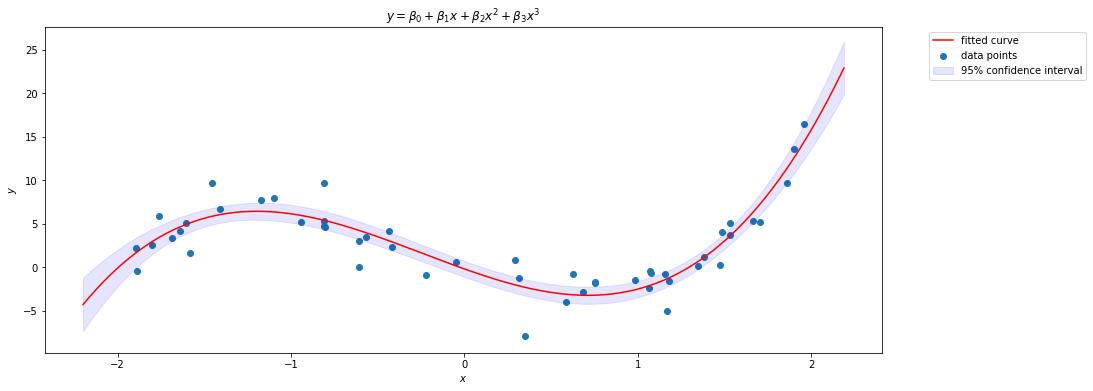

In [9]:
plt.figure(figsize=[15,6])
plt.plot(x, y_pred, color="r")
plt.scatter(q3_df.x, q3_df.y)
plt.fill_between(x, y_pred-ci, y_pred+ci, color='b', alpha=.1)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$")
plt.legend(["fitted curve", "data points", "95% confidence interval"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Q4

In [10]:
n = 40

BIC = {"0": 0.9596, "1": 0.7902, "2": 1.0517, "3": 1.0050, "4": 0.7338, "5": 0.7950,
       "12": 0.8786, "13": 0.8500, "14": 0.5632, "15": 0.3361, "23": 1.0972, "24": 0.8257, "25": 0.8822, 
       "34": 0.7451, "35": 0.8739, "45": -0.1927, "123": 0.9370, "124": 0.6468, "125": 0.4282, 
       "134": 0.5914, "135": 0.4283, "145": -4.6600, "234": 0.8358, "235": 0.9625,
       "245": -0.1099, "345": -0.1223, "1234": 0.6714, "1235": 0.5204, "1245": -4.6093, "1345": -4.6157, 
       "2345": -0.0372, "12345": -4.5600}

SSE = {'0': 95.2261, '1': 73.3037, '2': 95.2139, '3': 90.8737, '4': 69.2889, '5': 73.6588,
       '12': 73.0233, '13': 70.9692, '14': 53.2715, '15': 42.4473, '23': 90.8726, '24': 69.266, '25': 73.2872,
       '34': 63.9012, '35': 72.6848, '45': 25.016, '123': 70.5948, '124': 52.8136, '125': 42.444,
       '134': 49.9665, '135': 42.4467, '145': 0.2618, '234': 63.7998, '235': 72.4197, '245': 24.7802,
       '345': 24.4749, '1234': 49.3597, '1235': 42.4432, '1245': 0.2512,
       '1345': 0.2496, '2345': 24.3022, '12345': 0.2406}

Best model by BIC:

In [11]:
min_bic = 0
bic_model = ""

for key in BIC.keys():
    if BIC[key] < min_bic:
        min_bic = BIC[key]
        bic_model = key

bic_model, min_bic

('145', -4.66)

Best model by BIC and forward selection:

In [12]:
bic_fwd = BIC["0"]
bic_fwd_model = "0"

for i in range(1, 5):
    print(f"Model: '{bic_fwd_model}', BIC = {bic_fwd}")
    for model in BIC.keys():
        if len(model) == i and BIC[model] < bic_fwd:
            bic_fwd = BIC[model]
            bic_fwd_model = model

Model: '0', BIC = 0.9596
Model: '4', BIC = 0.7338
Model: '45', BIC = -0.1927
Model: '145', BIC = -4.66


Best model by BIC and backward elimination:

In [13]:
bic_bwd = BIC["12345"]
bic_bwd_model = "12345"

for i in range(4, 1, -1):
    print(f"Model: '{bic_bwd_model}', BIC = {bic_bwd}")
    for model in BIC.keys():
        if len(model) == i and BIC[model] < bic_bwd:
            bic_bwd = BIC[model]
            bic_bwd_model = model

Model: '12345', BIC = -4.56
Model: '1345', BIC = -4.6157
Model: '145', BIC = -4.66
